In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:

# Load the dataset with error handling
file_path = 'LG_Customer_Data_30.csv'  # Replace with the actual file path
try:
    customer_data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please provide a valid file path.")
    raise

# Display the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(customer_data.head())

# Display dataset info
print("
Dataset Info:")
print(customer_data.info())


SyntaxError: unterminated string literal (detected at line 15) (1215458159.py, line 15)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(customer_data.isnull().sum())

# Impute missing values for numerical columns using the median
numerical_columns = customer_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
customer_data[numerical_columns] = imputer.fit_transform(customer_data[numerical_columns])

print("\nMissing values handled. Dataset updated.")

In [ ]:

# Identify categorical columns
categorical_columns = customer_data.select_dtypes(include=['object']).columns

# Apply encoding for categorical columns
for column in categorical_columns:
    if customer_data[column].nunique() <= 10:  # Use label encoding for low-cardinality columns
        customer_data[column] = customer_data[column].astype('category').cat.codes
    else:  # Use one-hot encoding for high-cardinality columns
        customer_data = pd.get_dummies(customer_data, columns=[column], drop_first=True)

print("Categorical columns encoded.")


In [ ]:
# Normalize numerical data using StandardScaler
scaler = StandardScaler()
customer_data[numerical_columns] = scaler.fit_transform(customer_data[numerical_columns])

print("\nNumerical data normalized.")

In [3]:
# Compute the Within-Cluster Sum of Squares (WCSS) for 1-10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data[numerical_columns])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

print("\nCheck the plot to determine the optimal number of clusters.")

NameError: name 'customer_data' is not defined

In [4]:
# Set the number of clusters (based on the Elbow Method plot)
optimal_clusters = 4  # Adjust based on the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[numerical_columns])

print("\nClusters assigned to each data point.")
print(customer_data[['Cluster']].value_counts())

NameError: name 'customer_data' is not defined

In [5]:
# Check if columns 'Income' and 'Average_Spend' exist for plotting
if 'Income' in customer_data.columns and 'Average_Spend' in customer_data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=customer_data['Income'], 
        y=customer_data['Average_Spend'], 
        hue=customer_data['Cluster'], 
        palette='viridis', 
        s=100, 
        alpha=0.7
    )
    plt.title('Customer Segments based on Income and Average Spend')
    plt.xlabel('Income')
    plt.ylabel('Average Spend')
    plt.legend(title="Cluster")
    plt.show()
else:
    print("\nColumns 'Income' and 'Average_Spend' not found for plotting.")

NameError: name 'customer_data' is not defined

In [6]:
# Analyze cluster centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns)
print("\nCluster Centers:")
print(cluster_centers)

# Add cluster summary to the processed dataset
cluster_summary = customer_data.groupby('Cluster').mean()
print("\nCluster Summary Statistics:")
print(cluster_summary)

AttributeError: 'KMeans' object has no attribute 'cluster_centers_'

In [7]:
from scipy.stats import f_oneway

# Perform ANOVA for each feature to check for differences across clusters
anova_results = {}
for column in numerical_columns:
    groups = [customer_data[customer_data['Cluster'] == cluster][column] for cluster in range(optimal_clusters)]
    f_stat, p_val = f_oneway(*groups)
    anova_results[column] = {'F-Statistic': f_stat, 'P-Value': p_val}

# Display features with significant differences
significant_features = {k: v for k, v in anova_results.items() if v['P-Value'] < 0.05}
print("\nSignificant Features Across Clusters:")
for feature, stats in significant_features.items():
    print(f"{feature}: F-Statistic = {stats['F-Statistic']:.2f}, P-Value = {stats['P-Value']:.5f}")

NameError: name 'numerical_columns' is not defined

In [8]:
# Bar plot for cluster sizes
plt.figure(figsize=(8, 5))
customer_data['Cluster'].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Box plot for numerical features grouped by cluster
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=customer_data, palette='viridis')
    plt.title(f'Feature Distribution by Cluster: {column}')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

NameError: name 'customer_data' is not defined

<Figure size 800x500 with 0 Axes>

In [9]:
pip install aws lambda

Note: you may need to restart the kernel to use updated packages.


      Income  Average_Spend Age_Group  Loyalty_Score Preferred_Channel  \
0  -9.297689       6.473679     Adult              2            Online   
1  -9.698741       6.938967     Young              9            Mobile   
2  -1.686653       7.793442    Senior              2            Mobile   
3  -7.097308      -5.781333     Young              3            Mobile   
4 -10.876452       6.315437    Senior              1            Online   

   Cluster  
0        3  
1        3  
2        0  
3        2  
4        3  


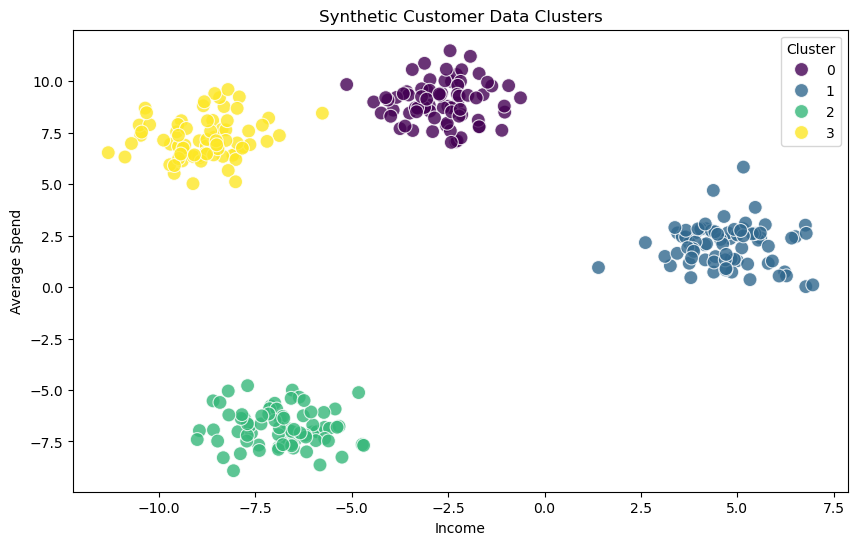

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Set parameters for synthetic dataset
n_samples = 300  # Total number of data points
n_features = 2   # Number of numerical features
n_clusters = 4   # Number of clusters

# Generate synthetic dataset with clusters
data, labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Create a DataFrame from the generated data
columns = ['Income', 'Average_Spend']  # Feature names
customer_data = pd.DataFrame(data, columns=columns)

# Add categorical features
customer_data['Age_Group'] = np.random.choice(['Young', 'Adult', 'Senior'], size=n_samples)
customer_data['Loyalty_Score'] = np.random.randint(1, 11, size=n_samples)  # 1 to 10 scale
customer_data['Preferred_Channel'] = np.random.choice(['Online', 'In-Store', 'Mobile'], size=n_samples)

# Add cluster labels (for verification or testing purposes)
customer_data['Cluster'] = labels

# Save to CSV (optional)
customer_data.to_csv('synthetic_customer_data.csv', index=False)

# Display sample rows
print(customer_data.head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Average_Spend', hue='Cluster', data=customer_data, palette='viridis', s=100, alpha=0.8)
plt.title("Synthetic Customer Data Clusters")
plt.xlabel("Income")
plt.ylabel("Average Spend")
plt.legend(title="Cluster")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

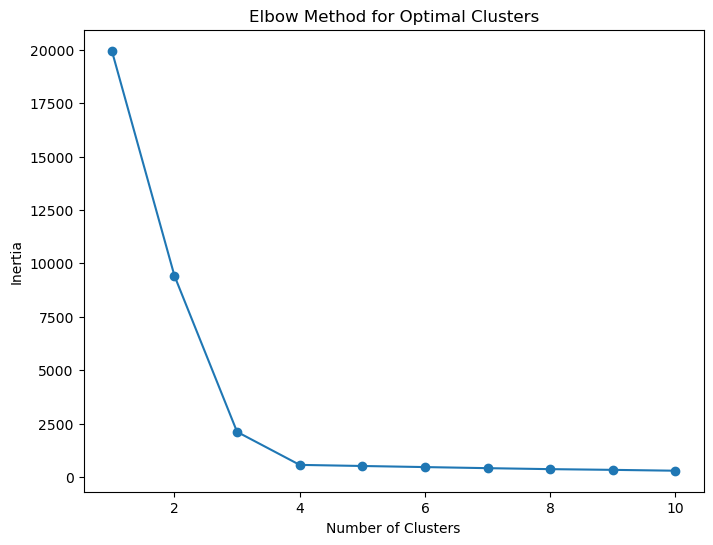

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Cluster     Income  Average_Spend
0        0  -9.297689       6.473679
1        0  -9.698741       6.938967
2        0  -1.686653       7.793442
3        1  -7.097308      -5.781333
4        0 -10.876452       6.315437


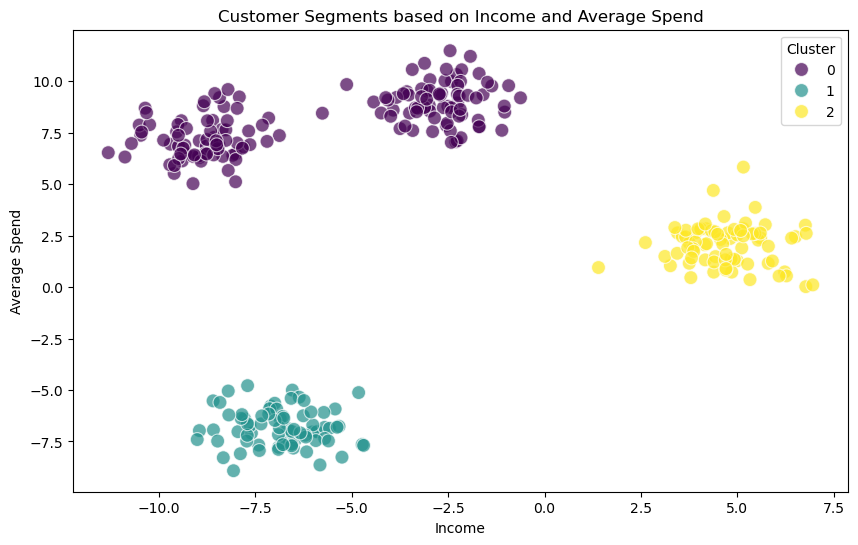

In [11]:
from sklearn.cluster import KMeans

# Define the features for clustering (normalized values of income and spend)
X = customer_data[['Income', 'Average_Spend']]

# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Applying KMeans with the optimal number of clusters (let's assume 3 clusters based on elbow method)
optimal_clusters = 3  # Adjust based on your elbow method outcome
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X)

# Show sample of customer data with cluster assignment
print(customer_data[['Cluster', 'Income', 'Average_Spend']].head())

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['Income'], y=customer_data['Average_Spend'], hue=customer_data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments based on Income and Average Spend')
plt.xlabel('Income')
plt.ylabel('Average Spend')
plt.show()

In [12]:
# Example demand elasticity calculation
# Assuming columns 'Price' and 'Quantity' are available in the dataset
def calculate_elasticity(price_initial, price_final, quantity_initial, quantity_final):
    price_change = (price_final - price_initial) / price_initial
    quantity_change = (quantity_final - quantity_initial) / quantity_initial
    return quantity_change / price_change

# Sample data (replace with actual data)
customer_data['Price_Initial'] = customer_data['Average_Spend']  # Assuming Average_Spend acts as price
customer_data['Quantity_Initial'] = customer_data['Average_Spend'] * 10  # Placeholder for quantity data
customer_data['Price_Final'] = customer_data['Price_Initial'] * 1.1  # Example: price increase of 10%
customer_data['Quantity_Final'] = customer_data['Quantity_Initial'] * 0.9  # Assuming demand drops with price increase

# Calculate elasticity for each customer segment
customer_data['Elasticity'] = customer_data.apply(lambda row: calculate_elasticity(
    row['Price_Initial'], row['Price_Final'], row['Quantity_Initial'], row['Quantity_Final']), axis=1)

# Display the elasticity values
print(customer_data[['Cluster', 'Elasticity']].head())

   Cluster  Elasticity
0        0        -1.0
1        0        -1.0
2        0        -1.0
3        1        -1.0
4        0        -1.0


In [13]:
# Price optimization based on elasticity
def optimize_price(elasticity, price):
    if elasticity > 0:  # Elastic product: decrease price
        return price * 0.9
    elif elasticity < 0:  # Inelastic product: increase price
        return price * 1.1
    else:  # Unchanged demand: no price change
        return price

# Apply price optimization
customer_data['Optimized_Price'] = customer_data.apply(lambda row: optimize_price(row['Elasticity'], row['Price_Initial']), axis=1)

# Show the updated prices
print(customer_data[['Cluster', 'Price_Initial', 'Optimized_Price']].head())

   Cluster  Price_Initial  Optimized_Price
0        0       6.473679         7.121046
1        0       6.938967         7.632864
2        0       7.793442         8.572787
3        1      -5.781333        -6.359466
4        0       6.315437         6.946980


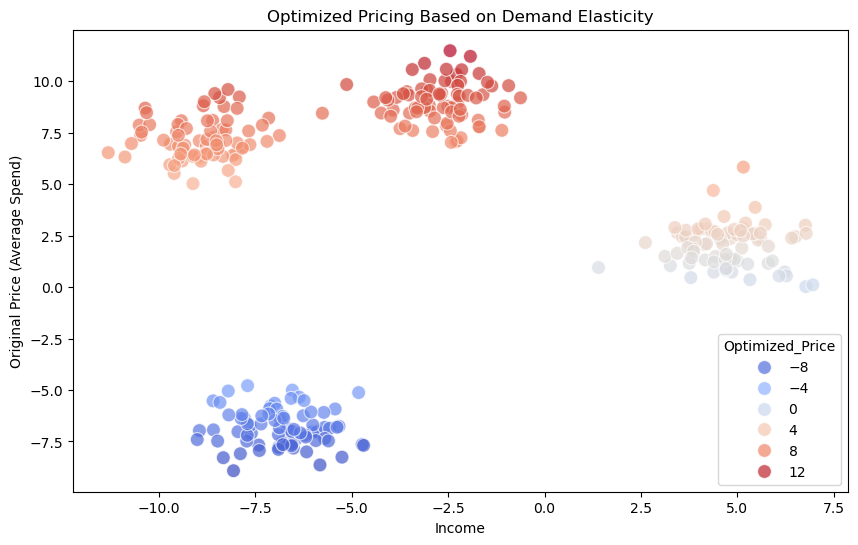

In [14]:
# Visualize the price optimization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data['Income'], y=customer_data['Average_Spend'], hue=customer_data['Optimized_Price'], palette='coolwarm', s=100, alpha=0.7)
plt.title('Optimized Pricing Based on Demand Elasticity')
plt.xlabel('Income')
plt.ylabel('Original Price (Average Spend)')
plt.show()

In [15]:
import joblib

# Save the trained model
model_path = 'kmeans_clustering_model.pkl'
joblib.dump("kmeans_clustering_model.pklh", "LG_Customer_Data_30.csv")
print(f"\nKMeans model saved to {"kmeans_clustering_model.pkl"}")

# Save the processed dataset for deployment
processed_data_path = 'processed_customer_data.csv'
customer_data.to_csv(processed_data_path, index=False)
print(f"\nProcessed data saved to {"kmeans_clustering_model.pkl"}")


KMeans model saved to kmeans_clustering_model.pkl

Processed data saved to kmeans_clustering_model.pkl


In [16]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
model_path = os.path.join(os.getcwd(), 'kmeans_model.pkl')
scaler_path = os.path.join(os.getcwd(), 'scaler.pkl')

with open(model_path, 'rb') as model_file:
    kmeans_model = pickle.load(model_file)
with open(scaler_path, 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

NameError: name 'pickle' is not defined

In [ ]:
pip install flask_cors

In [ ]:
import pickle
import numpy as np
from flask import Flask, request, jsonify
from flask_cors import CORS

# Initialize Flask app
app = Flask(__name__)
CORS(app)  # Enable CORS for cross-origin requests

# Load the model and scaler
with open('kmeans_model.pkl', 'rb') as model_file:
    kmeans_model = pickle.load(model_file)
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Log the incoming request
        print("Received data:", request.json)

        # Get JSON data from the request
        data = request.get_json()

        # Extract and validate inputs
        income = float(data.get('Income', 0))  # Default to 0 if key is missing
        avg_spend = float(data.get('Average_Spend', 0))  # Default to 0 if key is missing

        # Log extracted data
        print(f"Income: {income}, Average Spend: {avg_spend}")

        # Preprocess input data
        input_features = np.array([[income, avg_spend]])
        input_scaled = scaler.transform(input_features)

        # Make prediction
        cluster = kmeans_model.predict(input_scaled)[0]

        # Return the prediction
        return jsonify({'cluster': int(cluster)})

    except Exception as e:
        # Log and return the error
        print(f"Error: {str(e)}")
        return jsonify({'error': str(e)}), 400

# Run the app for local testing
if __name__ == '__main__':
    app.run(debug=True)

In [18]:

# Save the preprocessed dataset for further use or deployment
output_path = 'cleaned_customer_data.csv'
customer_data.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}.")


Cleaned dataset saved to cleaned_customer_data.csv.


In [1]:
jupyter nbconvert --to script Cleaned_Untitled7.ipynb

SyntaxError: invalid syntax (2220714539.py, line 1)